In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import cv2

In [2]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras import layers

In [26]:
DATADIR = "/Users/renu/Desktop/tom&jerry/tom_and_jerry/tom_and_jerry"
labels = ['tom', 'jerry','tom_jerry_0','tom_jerry_1']
Np_data = np.zeros((5478,1))
label = []
training_data = []
i = 0
image_height = 40
image_width = 72
batch_size = 32
for category in labels:
    path = os.path.join(DATADIR, category) 

for category in labels:
    path = os.path.join(DATADIR, category)
    print(path)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        new_array = cv2.resize(img_array, (image_height, image_width))
        numpydata = np.array(new_array)
        np.append(Np_data, numpydata)
        training_data.append([new_array, i])
        label.append(labels[i])
    i =1+i

/Users/renu/Desktop/tom&jerry/tom_and_jerry/tom_and_jerry/tom
/Users/renu/Desktop/tom&jerry/tom_and_jerry/tom_and_jerry/jerry
/Users/renu/Desktop/tom&jerry/tom_and_jerry/tom_and_jerry/tom_jerry_0
/Users/renu/Desktop/tom&jerry/tom_and_jerry/tom_and_jerry/tom_jerry_1


In [27]:
train_data = tf.keras.utils.image_dataset_from_directory(DATADIR, validation_split=0.2, subset="training",image_size=(image_height, image_width),seed =123,batch_size=batch_size)
  
val_data = tf.keras.utils.image_dataset_from_directory(DATADIR, validation_split=0.2, subset="validation", seed=123, image_size=(image_height, image_width), batch_size=batch_size)

Found 5478 files belonging to 5 classes.
Using 4383 files for training.
Found 5478 files belonging to 5 classes.
Using 1095 files for validation.


In [28]:
class_names = train_data.class_names
print(class_names)

['jerry', 'tom', 'tom_jerry_0', 'tom_jerry_1', 'untitled folder']


In [6]:
# print(X_train.shape)
# print(X_test.shape)
# X_train = X_train.reshape(2739,480,854,3)
# X_test = X_test.reshape(2739,480,854,3)
# #one-hot encode target column
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

In [29]:
for image_batch, labels_batch in train_data:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 40, 72, 3)
(32,)


In [30]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_data.cache().prefetch(buffer_size=AUTOTUNE)

In [31]:
normalization_layer = layers.Rescaling(1./255)

In [32]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))

In [33]:
#creating model
model = Sequential()

In [34]:
#adding layers
num_classes = 4

model = Sequential([
  layers.Rescaling(1./255, input_shape=(image_height, image_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [35]:
#Accuracy
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 40, 72, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (None, 40, 72, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 20, 36, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 20, 36, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 10, 18, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 10, 18, 64)       

In [37]:
trained_model = model.fit(train_ds,validation_data=val_ds,epochs=50)

Epoch 1/50
137/137 [==============================] - 3s 19ms/step - loss: 1.2692 - accuracy: 0.4107 - val_loss: 1.1227 - val_accuracy: 0.5251
Epoch 2/50
137/137 [==============================] - 2s 16ms/step - loss: 1.0084 - accuracy: 0.5868 - val_loss: 0.8927 - val_accuracy: 0.6411
Epoch 3/50
137/137 [==============================] - 2s 16ms/step - loss: 0.7594 - accuracy: 0.7077 - val_loss: 0.7296 - val_accuracy: 0.7096
Epoch 4/50
137/137 [==============================] - 2s 16ms/step - loss: 0.6060 - accuracy: 0.7702 - val_loss: 0.6436 - val_accuracy: 0.7580
Epoch 5/50
137/137 [==============================] - 2s 16ms/step - loss: 0.4722 - accuracy: 0.8202 - val_loss: 0.5672 - val_accuracy: 0.7982
Epoch 6/50
137/137 [==============================] - 2s 16ms/step - loss: 0.3970 - accuracy: 0.8524 - val_loss: 0.5726 - val_accuracy: 0.7963
Epoch 7/50
137/137 [==============================] - 2s 16ms/step - loss: 0.3213 - accuracy: 0.8770 - val_loss: 0.6082 - val_accuracy: 0.7863

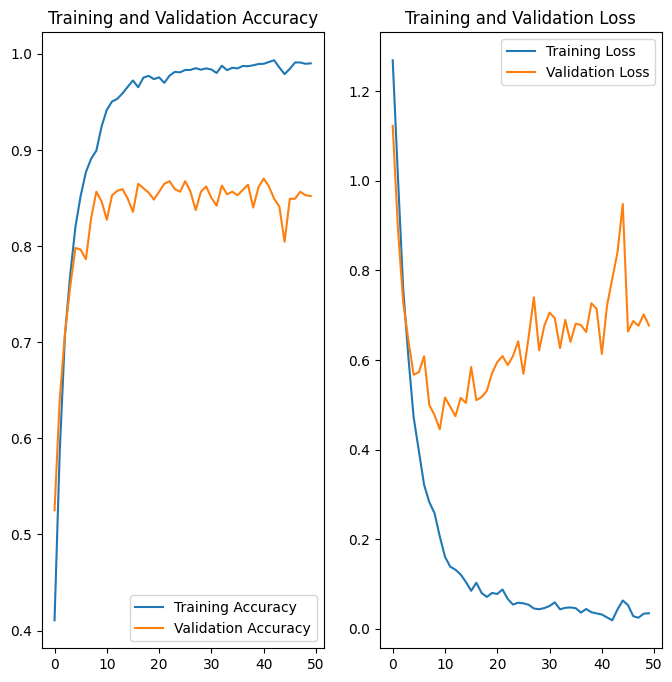

In [38]:
acc = trained_model.history['accuracy']
val_acc = trained_model.history['val_accuracy']
loss = trained_model.history['loss']
val_loss = trained_model.history['val_loss']
epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [39]:
data_augmentation = keras.Sequential([layers.RandomFlip("horizontal",input_shape=(image_height, image_width, 3)), layers.RandomRotation(0.1), layers.RandomZoom(0.1),])

In [44]:
model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.1),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [48]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   (None, 40, 72, 3)         0         
                                                                 
 conv2d_12 (Conv2D)          (None, 40, 72, 16)        448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 20, 36, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 20, 36, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 10, 18, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 10, 18, 64)       

In [50]:
trained_model = model.fit(train_ds,validation_data=val_ds,epochs=50)

Epoch 1/50
137/137 [==============================] - 5s 26ms/step - loss: 0.8943 - accuracy: 0.6539 - val_loss: 0.8481 - val_accuracy: 0.6566
Epoch 2/50
137/137 [==============================] - 4s 28ms/step - loss: 0.6750 - accuracy: 0.7340 - val_loss: 0.6499 - val_accuracy: 0.7543
Epoch 3/50
137/137 [==============================] - 4s 28ms/step - loss: 0.5766 - accuracy: 0.7833 - val_loss: 0.6943 - val_accuracy: 0.7543
Epoch 4/50
137/137 [==============================] - 4s 28ms/step - loss: 0.5287 - accuracy: 0.7972 - val_loss: 0.5972 - val_accuracy: 0.7845
Epoch 5/50
137/137 [==============================] - 4s 29ms/step - loss: 0.4816 - accuracy: 0.8184 - val_loss: 0.6395 - val_accuracy: 0.7626
Epoch 6/50
137/137 [==============================] - 4s 29ms/step - loss: 0.4653 - accuracy: 0.8225 - val_loss: 0.6783 - val_accuracy: 0.7671
Epoch 7/50
137/137 [==============================] - 4s 29ms/step - loss: 0.4158 - accuracy: 0.8369 - val_loss: 0.5775 - val_accuracy: 0.7872

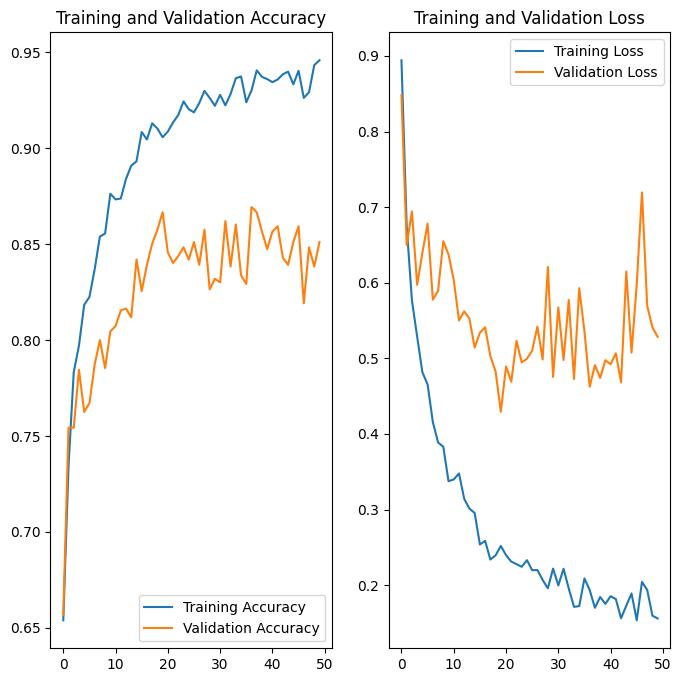

In [51]:
acc = trained_model.history['accuracy']
val_acc = trained_model.history['val_accuracy']
loss = trained_model.history['loss']
val_loss = trained_model.history['val_loss']
epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()